In [4]:
import cv2
import numpy as np
from PIL import Image
import yaml

In [9]:
cfg = yaml.safe_load(open('./cfg.yaml', 'r'))
intrinsics = cfg['camera_matrix']
distortion = cfg['distortion_coefficients']

In [3]:
def undistort(image):
    h, w = image.shape[:2]
    new_camera_matrix, roi = cv2.getOptimalNewCameraMatrix(intrinsics, distortion, (w,h), 1, (w,h))

    undistorted_img = cv2.undistort(image, intrinsics, distortion, None, new_camera_matrix)

    # Crop if needed (optional)
    x, y, w, h = roi
    undistorted_img = undistorted_img[y:y+h, x:x+w]

    # Resize original to match undistorted (for side-by-side)
    image_resized = cv2.resize(image, (undistorted_img.shape[1], undistorted_img.shape[0]))

    return image_resized


In [10]:
cam = cv2.VideoCapture(1)

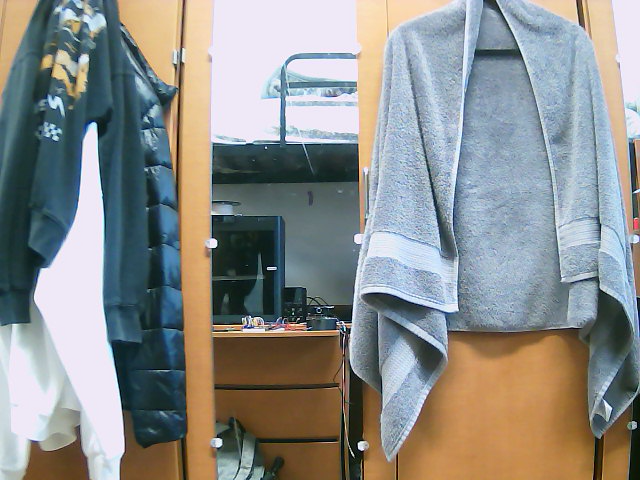

In [23]:
read, frame = cam.read()
frame = cv2.flip(frame, 1)

frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
Image.fromarray(frame)